Проект: выявить определяющие успешность игры закономерности для магазина компьютерных игр «Стримчик»

Дана таблица с данными до 2016 года.

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Надо сделать следующее:

1. Подготовить данные, обработать пропуски, посчитать суммарные продажи в каждом регионе
2. Проведите исследовательский анализ данных на основе данных за 2016 год
3. Составить портрет пользователя, определив жанры и платформы
4. Составить гипотезы : 

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

5. Вывод


# Загрузка данных

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from scipy.stats import binom
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/datasets/games.csv')
display(df)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Много пропусков в оценках и рейтинге. 

In [3]:
#изучим основную информацию
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


Файл состоит из 16713 строк, 11 колонок. В колонках `critic_score`, `user_score`, `rating` много пропусков, вплоть до половины от общего объема данных. Названия стболцов следует привести к принятому виду записи. В столбце `user_score` неверный тип данных.

# Обработка данных

Приведем названия столбцов к принятому виду:

In [4]:
df.columns = df.columns.str.lower()

Посчитаем количество дубликатов:

In [5]:
df.duplicated().sum()

0

In [6]:
print(df.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False).sum())
df.drop_duplicates(subset=['name', 'platform', 'year_of_release'], inplace = True)

4


Найдено и удалено 4 неявных дубликата строк совпадающих по столбцам `name`, `platform`, `year_of_release`.

Найдем пропуски:

In [7]:
for column in df.columns:
    missing_data = df[column].isna().sum()
    print(f'Пропусков в столбце "{column}":{missing_data}')

Пропусков в столбце "name":1
Пропусков в столбце "platform":0
Пропусков в столбце "year_of_release":269
Пропусков в столбце "genre":1
Пропусков в столбце "na_sales":0
Пропусков в столбце "eu_sales":0
Пропусков в столбце "jp_sales":0
Пропусков в столбце "other_sales":0
Пропусков в столбце "critic_score":8577
Пропусков в столбце "user_score":6700
Пропусков в столбце "rating":6765


In [8]:
# код ревьюера
df.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

Удалим пропуски в столбцах `name` и `year`

In [9]:
df = df.dropna(subset=['name']).reset_index(drop=True)
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)
df = df.dropna(subset=['genre']).reset_index(drop=True)

Приведем `year_of_release` к формату *pandas*

In [10]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y').dt.year

Заменим *tbd* на *NaN*. Эти значения встречаются как в старых, так и в новых релизах. Можно сказать, что про них просто забыли, не внеся значения в таблицу.

In [11]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'] = df['user_score'].astype('float64')

Оценим схожесть оценок пользователей и критиков:

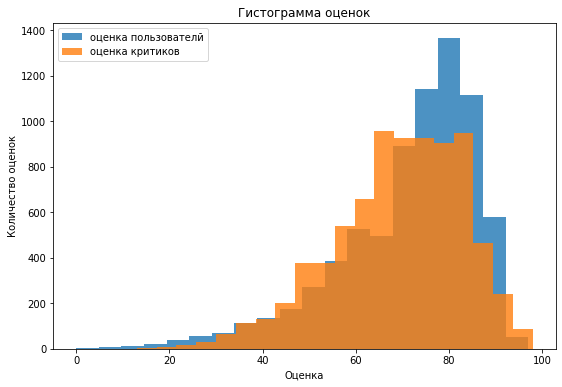

In [12]:
plt.figure(figsize=(9,6));
plt.hist(df['user_score']*10,label='оценка пользователй', bins=20, alpha=0.8);
plt.hist(df['critic_score'],label='оценка критиков', bins=20, alpha=0.8);
plt.xlabel('Оценка');
plt.ylabel('Количество оценок');
plt.title('Гистограмма оценок')
plt.legend();
plt.show;

Распределение оценок примерно одинаково, поэтому заменим пропущенные значения в `user_score` доступными значениями `critic_score` и наоборот.

In [13]:
df['user_score'].describe()

count    7462.000000
mean        7.126548
std         1.499429
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [14]:
df['critic_score'].describe()

count    7982.000000
mean       68.992608
std        13.920049
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [15]:
user_mean_old = df['user_score'].describe()['mean']
user_med_old = df['user_score'].describe()['50%']
critic_mean_old = df['critic_score'].describe()['mean']
critic_med_old = df['critic_score'].describe()['50%']

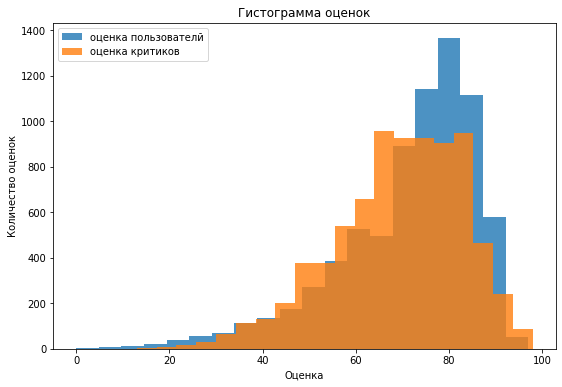

In [17]:
plt.figure(figsize=(9,6));
plt.hist(df['user_score']*10,label='оценка пользователй', bins=20, alpha=0.8);
plt.hist(df['critic_score'],label='оценка критиков', bins=20, alpha=0.8);
plt.xlabel('Оценка');
plt.ylabel('Количество оценок');
plt.title('Гистограмма оценок')
plt.legend();
plt.show;


In [18]:
df['user_score'].describe()

count    7462.000000
mean        7.126548
std         1.499429
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [19]:
df['critic_score'].describe()

count    7982.000000
mean       68.992608
std        13.920049
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [20]:
user_mean_new = df['user_score'].describe()['mean']
user_med_new= df['user_score'].describe()['50%']
critic_mean_new = df['critic_score'].describe()['mean']
critic_med_new = df['critic_score'].describe()['50%']

Посчитаем изменение средней и медианы после подстановки:

In [21]:
print(f'Изменение среднего значения user_score:   {(1 - user_mean_new / user_mean_old):.2%}')
print(f'изменение медианного значения user_score: {(1-user_med_new/user_med_old):.2%}')
print(f'изменение среднего значения critic_score: {(1-critic_mean_new/critic_mean_old):.2%}')
print(f'изменение медианного значения user_score: {(1-critic_med_new/critic_med_old):.2%}')

Изменение среднего значения user_score:   0.00%
изменение медианного значения user_score: 0.00%
изменение среднего значения critic_score: 0.00%
изменение медианного значения user_score: 0.00%


Изменения незначительны.

Посчитаем суммарные продажи:

In [22]:
df['total_sales'] = df[['na_sales', 'jp_sales', 'eu_sales', 'other_sales']].sum(axis=1)

Названия столбцов приведены к принятому стилю. Удалено 273 строчки из-за пропусков в столбцах name, year_of_release, genre.
Значения tbd были заменены NaN. Добавлен столбец с суммарными продажами по всем регионам `total_sales`.

# Исследовательский анализ данных

Сколько игр выпускалось каждый год:

In [23]:
df.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

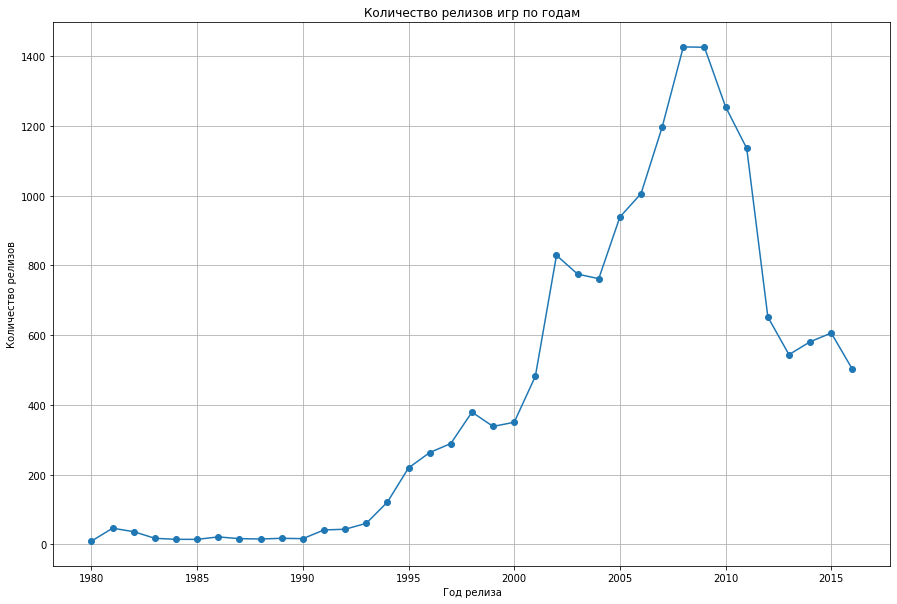

In [24]:
plt.figure(figsize=(15, 10))
plt.plot(df.groupby('year_of_release').size().index, df.groupby('year_of_release').size().values, marker='o')
plt.xlabel('Год релиза')
plt.ylabel('Количество релизов')
plt.title('Количество релизов игр по годам')
plt.grid(True)


plt.show()

Пик продаж игр приходится на период с 2006 по 2011 г.

Продажи по платформам:

In [25]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Видно, что больше всего продаж на устаревших платформах *PS2*, *X360*, *Wii*.

Изучим топ-3 платформ по продажам в год:

In [26]:
df.query('platform=="PS2"').groupby(['year_of_release'])['name'].count()

year_of_release
2000     82
2001    185
2002    280
2003    256
2004    259
2005    260
2006    259
2007    214
2008    191
2009     96
2010     38
2011      7
Name: name, dtype: int64

Платформа вышла в 2000 году. В 2006 года вышло следующее поколоние консоли. С 2006 года количество игр на ней уменьшается

In [27]:
df.query('platform=="X360"').groupby(['year_of_release'])['name'].count()

year_of_release
2005     18
2006     93
2007    123
2008    146
2009    172
2010    182
2011    206
2012    106
2013     75
2014     63
2015     35
2016     13
Name: name, dtype: int64

Платформа вышла в 2005 году. В 2013 года вышло следующее поколоние консоли. С 2011 года количество игр на ней уменьшается

In [28]:
df.query('platform=="Wii"').groupby(['year_of_release'])['name'].count()

year_of_release
2006     44
2007    185
2008    282
2009    325
2010    253
2011    143
2012     31
2013     12
2014      6
2015      4
2016      1
Name: name, dtype: int64

Платформа вышла в 2006 году. В 2012 года вышло следующее поколоние консоли. С 2009 года количество игр на ней уменьшается

Построим распределения по годам для платформ с наибольшими продажами за весь период:

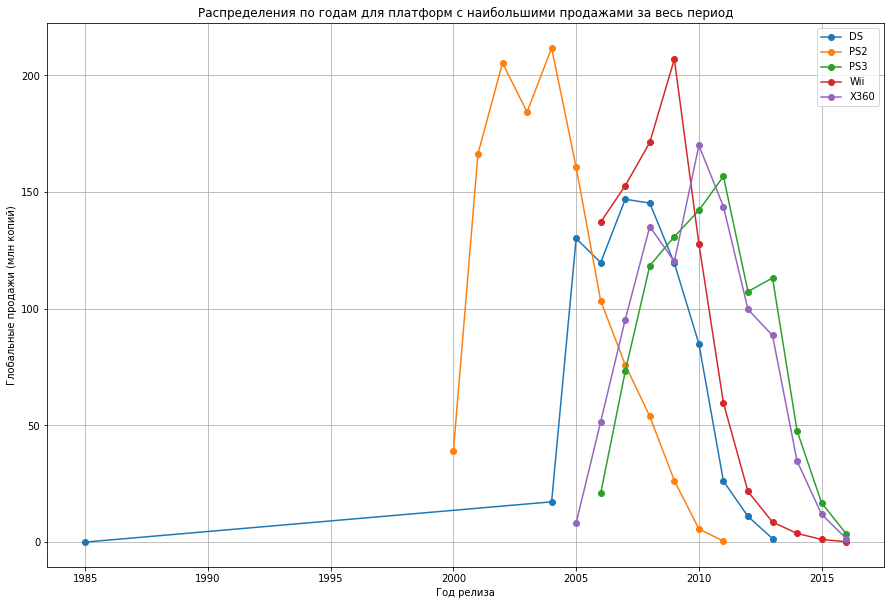

In [29]:
#Найдем топ-5 платформ за все время:
top5_plat_alltime = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5)

#В исходной таблице выберем только те, строки, в которых есть наши топ-5 платформ:
top5_plat = df[df['platform'].isin(top5_plat_alltime.index)]

#Сгруппируем таблицу по годам и платформам, чтобы построить график
alltime_platform_sales = top5_plat.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

#Для цикла нужно найти все названия платформ:
alltime_platforms = alltime_platform_sales['platform'].unique()

plt.figure(figsize=(15, 10))

# Строим отдельный график для каждой платформы
for platform in alltime_platforms:
    data = alltime_platform_sales[alltime_platform_sales['platform'] == platform]
    plt.plot(data['year_of_release'], data['total_sales'], marker='o', label=platform)
    
plt.xlabel('Год релиза')
plt.ylabel('Глобальные продажи (млн копий)')
plt.title('Распределения по годам для платформ с наибольшими продажами за весь период')
plt.legend()
plt.grid(True)
plt.show()

Можно сказать, что время жизни составляет примерно 8 лет. Однако надо учесть, что взяты данные о старых платформах. Сейчас, вероятно, ситуация несколько иная.

Актуальными будем считать данные с 2014 года, когда старые платформы уже отошли на второй план:

In [30]:
df_2014 = df.query('year_of_release >= 2014')
df_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           940 non-null    object 
 11  total_sales      1689 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 171.5+ KB


In [31]:
for column in df_2014.columns:
    missing_data = df_2014[column].isna().sum()
    print(f'Пропусков в столбце "{column}":{missing_data}')

Пропусков в столбце "name":0
Пропусков в столбце "platform":0
Пропусков в столбце "year_of_release":0
Пропусков в столбце "genre":0
Пропусков в столбце "na_sales":0
Пропусков в столбце "eu_sales":0
Пропусков в столбце "jp_sales":0
Пропусков в столбце "other_sales":0
Пропусков в столбце "critic_score":971
Пропусков в столбце "user_score":801
Пропусков в столбце "rating":749
Пропусков в столбце "total_sales":0


In [32]:
df_2014.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

В качестве потенциально прибыльных платформ возьмем *PS4*, *XOne* и *3DS*

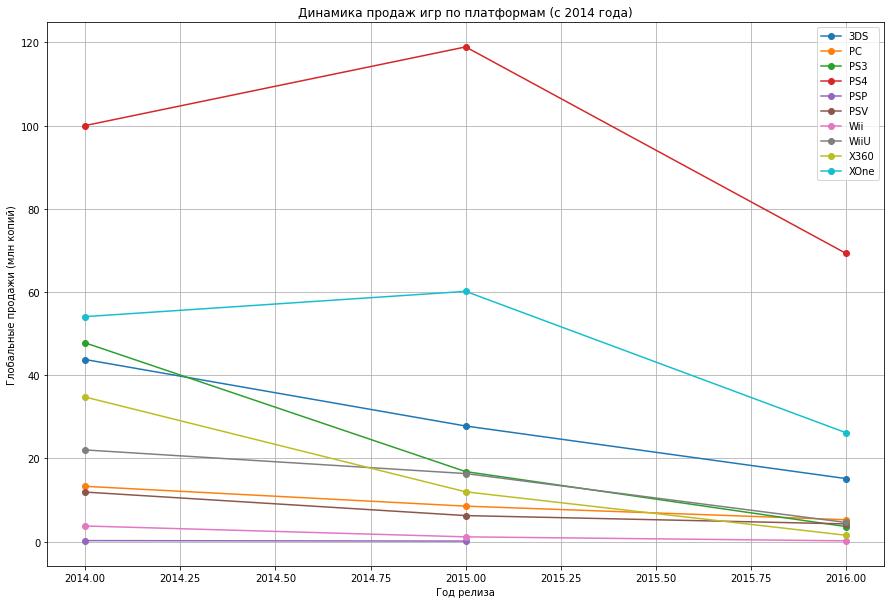

In [33]:
platform_sales = df_2014.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

platforms = platform_sales['platform'].unique()

plt.figure(figsize=(15, 10))

# Строим отдельный график для каждой платформы
for platform in platforms:
    data = platform_sales[platform_sales['platform'] == platform]
    plt.plot(data['year_of_release'], data['total_sales'], marker='o', linestyle='-', label=platform)

plt.xlabel('Год релиза')
plt.ylabel('Глобальные продажи (млн копий)')
plt.title('Динамика продаж игр по платформам (с 2014 года)')
plt.legend()
plt.grid(True)
plt.show()

*PS4* и *XOne* в любом случае самые интересные платформы по причине своей популярности.

In [34]:
df_2014.query('platform == "PS4" or platform == "XOne" or platform == "3DS"').groupby(['platform','year_of_release'])['total_sales'].sum()

platform  year_of_release
3DS       2014                43.76
          2015                27.78
          2016                15.14
PS4       2014               100.00
          2015               118.90
          2016                69.25
XOne      2014                54.07
          2015                60.14
          2016                26.15
Name: total_sales, dtype: float64

Это актуальные платформы с наибольшими продажами.

Построим диаграмму размаха для выбранных платформ:

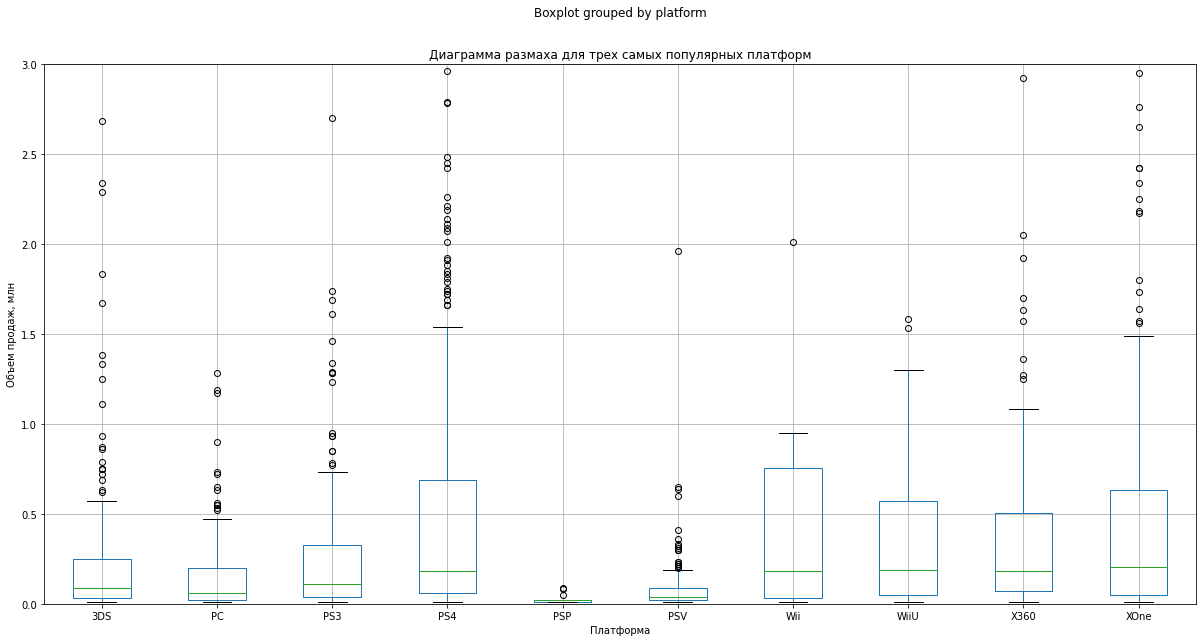

In [35]:
ax = df_2014.boxplot(by='platform',column='total_sales',figsize=(20,10))
plt.xlabel('Платформа')
plt.ylabel('Объем продаж, млн')
plt.title('Диаграмма размаха для трех самых популярных платформ')
plt.ylim(0,3);

И все же я бы остановился на своем изначальном выборе: *PS4*, *XOne*, *3DS*. Как я вижу, основной конкурент *3DS* - *WiiU*, но *3DS* показывает более надежные стабильные продажи.

In [36]:
df_2014.query('platform == "PS4"')['total_sales'].describe()

count    376.000000
mean       0.766356
std        1.614969
min        0.010000
25%        0.057500
50%        0.185000
75%        0.690000
max       14.630000
Name: total_sales, dtype: float64

In [37]:
df_2014.query('platform == "XOne"')['total_sales'].describe()

count    228.000000
mean       0.615614
std        1.046513
min        0.010000
25%        0.050000
50%        0.205000
75%        0.632500
max        7.390000
Name: total_sales, dtype: float64

In [38]:
df_2014.query('platform == "3DS"')['total_sales'].describe()

count    212.000000
mean       0.408868
std        1.188368
min        0.010000
25%        0.030000
50%        0.090000
75%        0.250000
max       11.680000
Name: total_sales, dtype: float64

Медиана продаж отличается слабо для всех платформ. Широкие ящики у PS4 и XOne говорят о большом количестве успешных и неуспешных игр. У 3DS игры имеют стабильное распределение по продажам. Самые крупные продажи у PS4, но у 3DS продажи более стабильные.

Проверим отзывы пользователей и критиков влияют на продажи:

Корреляции оценок и продаж для PS4, XOne, 3DS и по всем платформам:

In [39]:
print('Коэффициент корреляции между продажами и оценкой критиков для PS4:',df_2014.query('platform == "PS4"')['total_sales'].corr(df_2014['critic_score']))
print('Коэффициент корреляции между продажами и оценкой пользователей для PS4:', df_2014.query('platform == "PS4"')['total_sales'].corr(df_2014['user_score']))

Коэффициент корреляции между продажами и оценкой критиков для PS4: 0.40266141068104094
Коэффициент корреляции между продажами и оценкой пользователей для PS4: -0.040131589472697356


In [40]:
print('Коэффициент корреляции между продажами и оценкой критиков для XOne:',df_2014.query('platform == "XOne"')['total_sales'].corr(df_2014['critic_score']))
print('Коэффициент корреляции между продажами и оценкой пользователей для XOne:',df_2014.query('platform == "XOne"')['total_sales'].corr(df_2014['user_score']))

Коэффициент корреляции между продажами и оценкой критиков для XOne: 0.42867694370333226
Коэффициент корреляции между продажами и оценкой пользователей для XOne: -0.0703839280647581


In [41]:
print('Коэффициент корреляции между продажами и оценкой критиков для 3DS:',df_2014.query('platform == "3DS"')['total_sales'].corr(df_2014['critic_score']))
print('Коэффициент корреляции между продажами и оценкой пользователей для 3DS:',df_2014.query('platform == "3DS"')['total_sales'].corr(df_2014['user_score']))

Коэффициент корреляции между продажами и оценкой критиков для 3DS: 0.31411749286905105
Коэффициент корреляции между продажами и оценкой пользователей для 3DS: 0.2151932718527028


In [42]:
print('Коэффициент корреляции между продажами и оценкой критиков по всем платформам:', df_2014['total_sales'].corr(df_2014['critic_score']))
print('Коэффициент корреляции между продажами и оценкой пользователей по всем платформам:', df_2014['total_sales'].corr(df_2014['user_score']))

Коэффициент корреляции между продажами и оценкой критиков по всем платформам: 0.3281050869663631
Коэффициент корреляции между продажами и оценкой пользователей по всем платформам: -0.01307030500248458


По всем платформам продажи слабо коррелируют с оценками критиков (0.33) и вообще не коррелируют с оценками пользователей(-0.01). Для *PS4* и *XOne* оценки критиков средне коррелируют с продажами(0.40 и 0.43). Для *3DS* корреляция продаж с оценками критиков совпадает с корреляцией по всем платформам, но появилась слабая корреляция с оценками пользователей (0.22), что выбивается из всей картины.

Цикл для вывода диаграмм рассеяния по всем платформам:

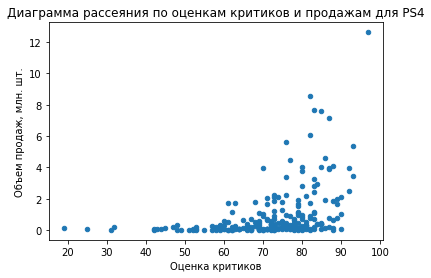

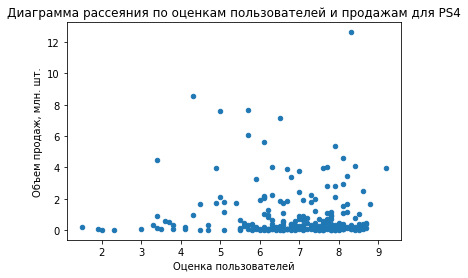

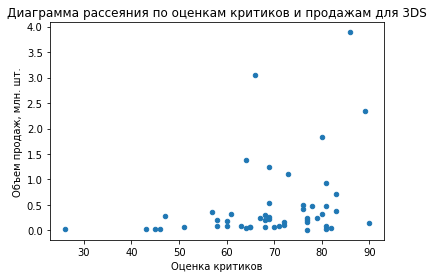

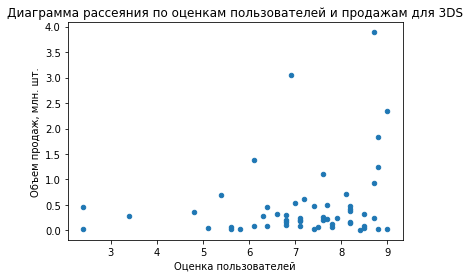

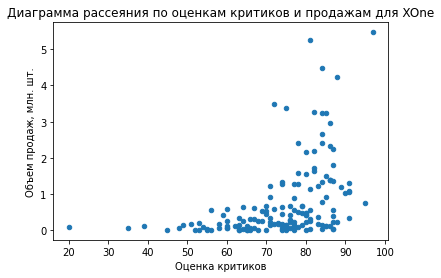

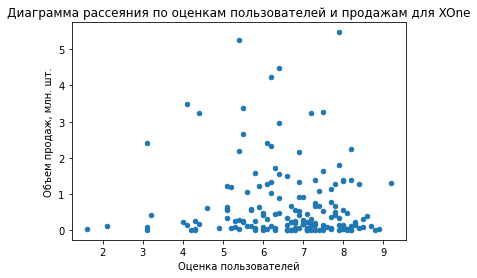

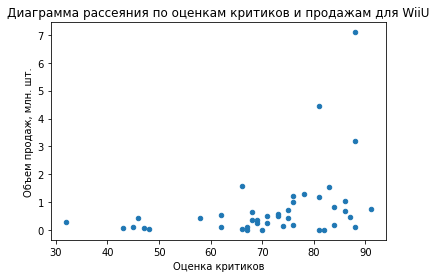

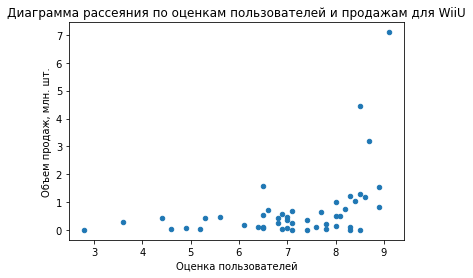

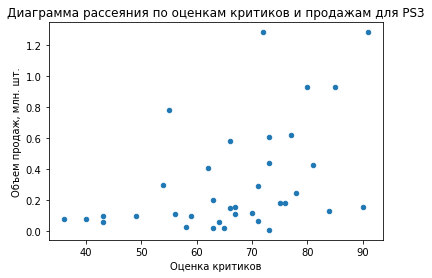

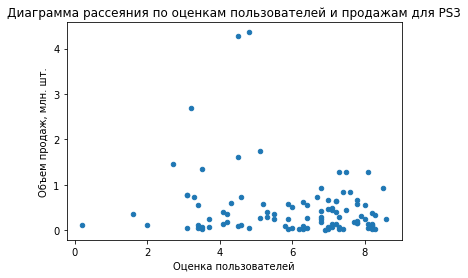

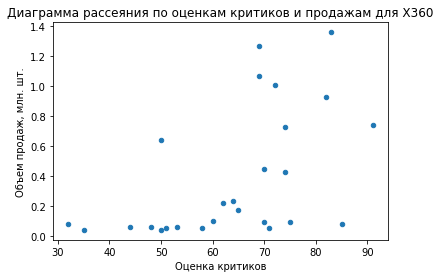

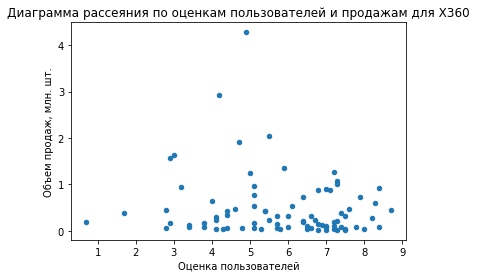

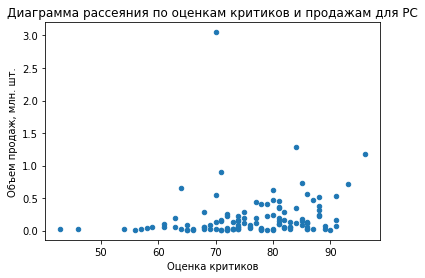

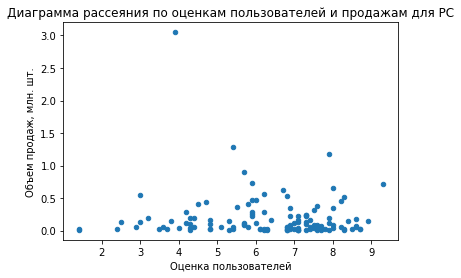

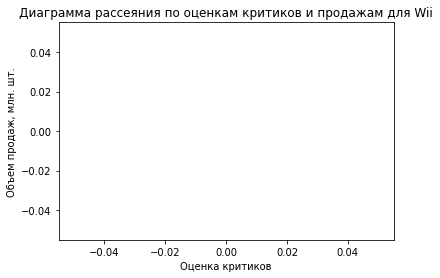

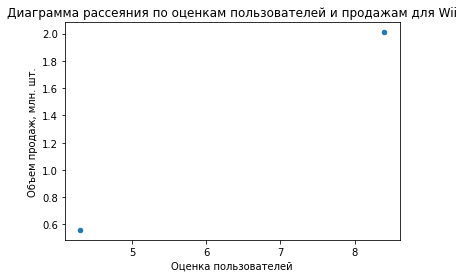

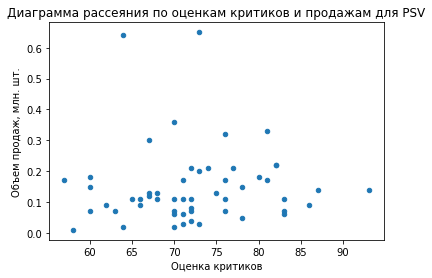

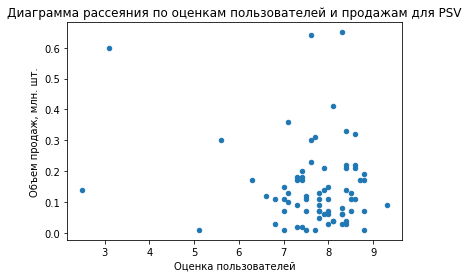

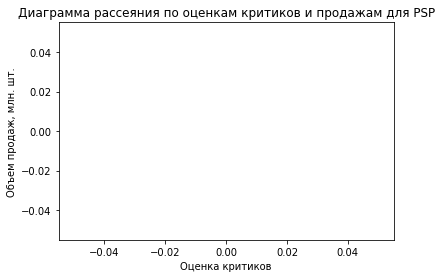

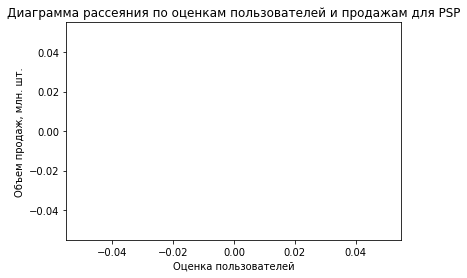

In [43]:
platforms = df_2014['platform'].unique()
scores = ['critic_score', 'user_score']
for plat in platforms:
    for score in scores:
        ax = df_2014[df_2014['platform'] == plat].plot(x=score, y='total_sales', kind='scatter');
        if score == 'critic_score':
            plt.title(f'Диаграмма рассеяния по оценкам критиков и продажам для {plat}');
        else:
            plt.title(f'Диаграмма рассеяния по оценкам пользователей и продажам для {plat}');
        if score == 'critic_score':
            plt.xlabel('Оценка критиков');
        else:
            plt.xlabel('Оценка пользователей');
        plt.ylabel('Объем продаж, млн. шт.');

Найдем самые прибыльные жанры:

In [44]:
#df_2014.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

In [45]:
#df_2014.groupby('genre')['total_sales'].count().sort_values(ascending=False)

Построим визуализацию по медианным продажам для каждого жанра:


genre
Shooter         0.515
Sports          0.180
Platform        0.140
Fighting        0.125
Role-Playing    0.110
Simulation      0.100
Action          0.090
Misc            0.090
Racing          0.090
Strategy        0.060
Puzzle          0.045
Adventure       0.030
Name: total_sales, dtype: float64


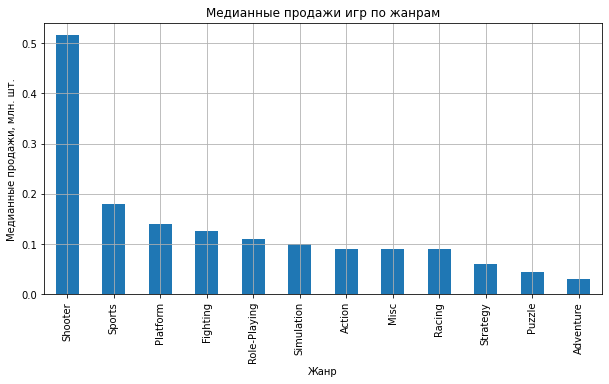

In [46]:
#Сгруппируем данные по жанру, найдем медиану продаж и выведем список:
genre_median_sales = df_2014.groupby('genre')['total_sales'].median().sort_values(ascending=False)
print(genre_median_sales)

#Визуализируем это:
plt.figure(figsize=(10,5))
genre_median_sales.plot(kind='bar')
plt.title('Медианные продажи игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Медианные продажи, млн. шт.')
plt.grid(True)
plt.show()

Топ-3 жанра по медианным продажам: *Shooter*, *Sports*, *Misc*. Так как жанр *Misc* мало о чем конкретном может сказать, расположим на 3 месте жанр *Role-Playing*. 

Обратный топ-3: *Puzzle*, *Adventure*, *Strategy*

# Портрет пользователя каждого региона

Функция для определения топ-5 жанров для каждого региона:

In [47]:
def top5_genres(region):
    return df_2014.groupby('genre')[region].sum().sort_values(ascending=False).head(5)

Функция для определения топ-5 платформ для каждого региона:

In [48]:
def top5_platforms(region):
    
    #Группируем по платформы по региону, сортируем в порядке убывания
    platforms_by_sales = df_2014.groupby('platform')[region].sum().sort_values(ascending=False)
    
    #Считаем общее количество продаж
    total_sales = platforms_by_sales.sum()
    
    #Топ 5 платформ
    top5 = platforms_by_sales.head(5)
    
    #Из общего количества вычитаем продажи топ-5 платформ в группу "Другие"
    other_sales = total_sales - top5.sum()
    
    #Добавляем в таблицу предыдущий результат
    platform_pie = top5.append(pd.Series({'Другие': other_sales}))
    
    #Считаем доли
    platform_pie = platform_pie / total_sales * 100 
    
    return platform_pie

Функция для построения круговой диаграммы по долям платформ в каждом регионе:

In [49]:
def plot_pie_chart(data, title):
    plt.figure(figsize=(6, 6))
    plt.pie(data, labels=data.index, autopct='%1.2f%%')
    plt.title(title)
    plt.show()

Функция для построения столбчатой диаграммы по жанрам в каждом регионе:

In [50]:
def genre_chart(data, title):
    data.plot(kind='bar', figsize=(10, 5))
    plt.title(title)
    plt.ylabel('Средние продажи млн. шт.')
    plt.xlabel('Жанр')
    plt.grid(True)
    plt.show()

Функция для построния столбчатой диаграммы для определения влияния рейтинга *ESRB* на продажи:

In [51]:
esrb = df_2014.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].mean()

def esrb_chart(data, title):
    data.plot(kind='bar', figsize=(10, 5))
    plt.title(title)
    plt.ylabel('Средние продажи млн. шт.')
    plt.xlabel('Рейтинг ESRB')
    plt.grid(True)
    plt.show()

Япония:

Определим 5 популярных жанров:

In [52]:
top5genres_jp = top5_genres('jp_sales')
top5genres_jp

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64

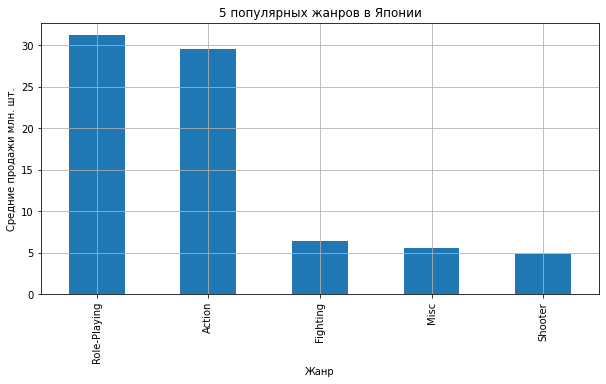

In [53]:
genre_chart(top5genres_jp, '5 популярных жанров в Японии')

Определим доли пяти популярных платформ и построим круговую диаграмму:

In [54]:
top5platforms_jp = top5_platforms('jp_sales')
top5platforms_jp

3DS       47.523902
PS4       16.134923
PSV       15.619293
PS3       12.052852
WiiU       7.852616
Другие     0.816414
dtype: float64

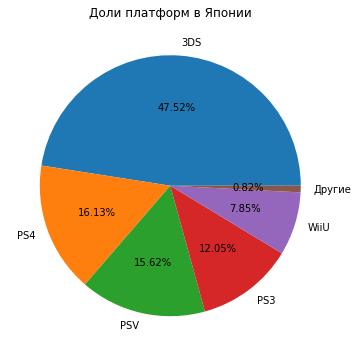

In [55]:
plot_pie_chart(top5platforms_jp, 'Доли платформ в Японии')

Найдем зависимость продаж от возрастного рейтинга:

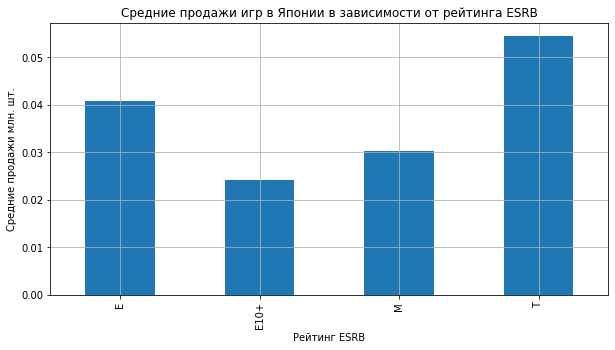

In [56]:
esrb_chart(esrb['jp_sales'], 'Средние продажи игр в Японии в зависимости от рейтинга ESRB')

В Японии популярны платформы японского происхождения, платформы из других регионов не представлены. Можно выделить два доминирующих жанра: *Role-Playing*, *Action*. С большим отрывом самая популярная платформа *3DS*. Больше всего игр продаются с рейтингом *Т*

Северная Америка:

Определим 5 популярных жанров:

In [57]:
top5genres_na = top5_genres('na_sales')
top5genres_na

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64

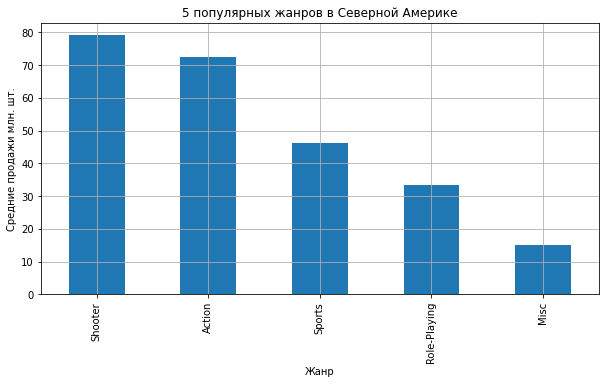

In [58]:
genre_chart(top5genres_na, '5 популярных жанров в Северной Америке')

Определим доли пяти популярных платформ и построим круговую диаграмму:

In [59]:
top5platforms_na = top5_platforms('na_sales')
top5platforms_na

PS4       34.714497
XOne      28.610153
X360       9.962684
3DS        7.970147
PS3        7.762445
Другие    10.980075
dtype: float64

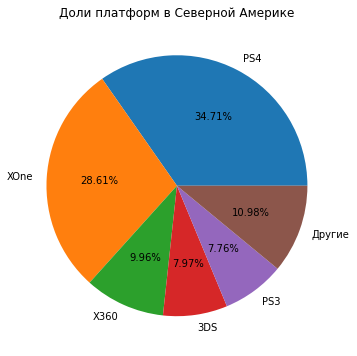

In [60]:
plot_pie_chart(top5platforms_na, 'Доли платформ в Северной Америке')

Найдем зависимость продаж от возрастного рейтинга:

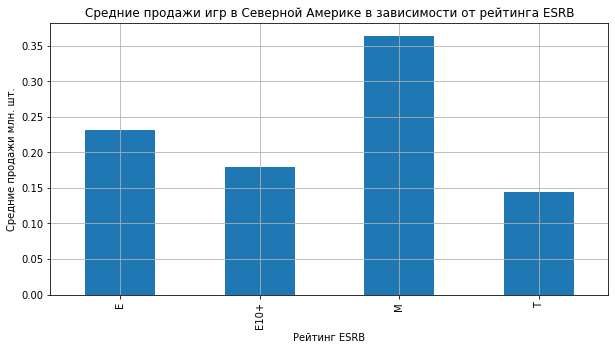

In [61]:
esrb_chart(esrb['na_sales'], 'Средние продажи игр в Северной Америке в зависимости от рейтинга ESRB')

В Северной Америке самые популярные платформы *PS4*, *XOne*, *X360*. Топ-3 жанра: *Shooter*, *Action*, *Sports*. Больше всего игр продаются с рейтингом *M*. То есть либо в этом регионе высокий возраст геймеров, либо никто на возрастные рейтинги не смотрит.

Европа:

Определим 5 популярных жанров:

In [62]:
top5genres_eu = top5_genres('eu_sales')
top5genres_eu

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

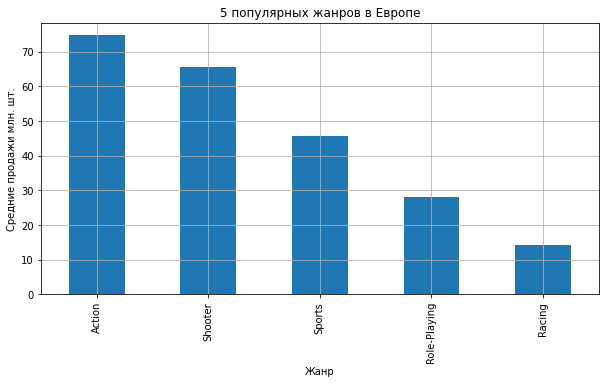

In [63]:
genre_chart(top5genres_eu, '5 популярных жанров в Европе')

Определим доли пяти популярных платформ и построим круговую диаграмму:

In [64]:
top5platforms_eu = top5_platforms('eu_sales')
top5platforms_eu

PS4       48.041968
XOne      17.086597
PS3        9.435496
PC         6.638836
3DS        5.955372
Другие    12.841732
dtype: float64

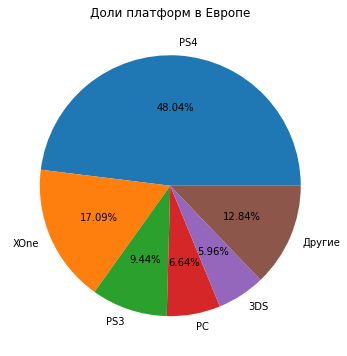

In [65]:
plot_pie_chart(top5platforms_eu, 'Доли платформ в Европе')

Найдем зависимость продаж от возрастного рейтинга:

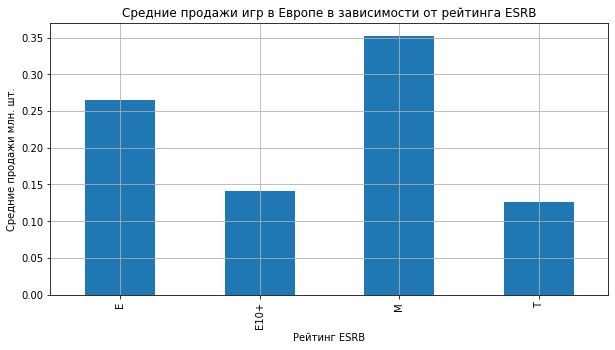

In [66]:
esrb_chart(esrb['eu_sales'], 'Средние продажи игр в Европе в зависимости от рейтинга ESRB')

В Европе самые популярные платформы *PS4*, *XOne*, *PS3*. Топ-3 жанра:  *Action*, *Shooter*, *Sports*. Больше всего игр продаются с рейтингом *M*. То есть либо в этом регионе высокий возраст геймеров, либо никто на возрастные рейтинги не смотрит.

# Проверка гипотез

In [67]:
df_2014 = df_2014.dropna(subset=['user_score']).reset_index(drop=True)

In [68]:
df_2014.query('platform == "XOne"')['user_score'].count()

165

In [69]:
df_2014.query('platform == "PC"')['user_score'].count()

122

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1: Средние пользовательские рейтинги платформ Xbox One и PC неодинаковые

In [70]:
alpha = 0.05

result = st.ttest_ind(df_2014.query('platform == "XOne"')['user_score'], df_2014.query('platform == "PC"')['user_score'])

print('p-значение',result.pvalue)

a = df_2014.query('platform == "XOne"')['user_score'].mean()
print('среднее значение XOne',a)
b = df_2014.query('platform == "PC"')['user_score'].mean()
print('среднее значение PC', b)


if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC неодинаковые.")
else:
    print("Не отвергаем нулевую гипотезу: С большой долей вероятности средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий")

p-значение 0.10450507919348415
среднее значение XOne 6.594545454545456
среднее значение PC 6.298360655737705
Не отвергаем нулевую гипотезу: С большой долей вероятности средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий


Пользователи этих платформ "мыслят" с большой долей вероятности одинаково.

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

H1: Средние пользовательские рейтинги жанров Actionи Sports разные.

In [71]:
alpha = 0.05

result = st.ttest_ind(df_2014.query('genre == "Action"')['user_score'], df_2014.query('genre == "Sports"')['user_score'])

print('p-значение',result.pvalue)

a = df_2014.query('genre == "Action"')['user_score'].mean()
print(a)
b = df_2014.query('genre == "Sports"')['user_score'].mean()
print(b)


if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports разные.")
else:
    print("Не отвергаем нулевую гипотезу: Средние пользовательские рейтинги жанров Actionи Sports одинаковые.")

p-значение 2.8711147985105864e-19
6.760606060606061
5.2251968503937
Отвергаем нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports разные.


# Вывод

1. Обработка данных:
    1. Удалена 271 строчки из-за пропусков в столбцах `name`, `year_of_release`, `genre`.
    2. Значения *tbd* были заменены NaN.
    3. Найдено и удалено 4 неявных дубликата строк совпадающих по столбцам `name`, `platform`, `year_of_release`.
2. Исследовательский анализ данных:
    1. Пик продаж игр приходится на период с 2006 по 2011 г.
    2. Видно, что больше всего продаж на устаревших к 2016 году платформах *PS2*, *X360*, *Wii*.
    3. Время жизни платформы составляет примерно 8 лет. Однако надо учесть, что взяты данные о старых платформах. Сейчас, вероятно, ситуация несколько иная.
    4. Актуальными будем считать данные с 2014 года, когда старые платформы уже отошли на второй план.
    5. Самыми перспективными платформами на 2017 год выбраны *PS4*, *XOne*, *3DS*. Медиана продаж у *PS4* и *XOne* cхожа, а у *3DS* заментно ниже. (*PS4*=0.19, *XOne*=0.21, *3DS*= 0.09). Широкие ящики у *PS4* и *XOne* говорят о большом количестве успешных и неуспешных игр. У *3DS* игры имеют стабильное распределение по продажам. Самые крупные продажи у *PS4*, но у *3DS* продажи более стабильные.
    6. По всем платформам продажи слабо коррелируют с оценками критиков (0.33) и вообще не коррелируют с оценками пользователей(-0.01). Для *PS4* и *XOne* оценки критиков средне коррелируют с продажами(0.40 и 0.43). Для *3DS* корреляция продаж с оценками критиков совпадает с корреляцией по всем платформам, но появилась слабая корреляция с оценками пользователей (0.22), что выбивается из всей картины.
    7. Топ-3 жанра по медианным продажам: *Shooter*, *Sports*, *Misc*. Так как жанр *Misc* мало о чем конкретном может сказать, расположим на 3 месте жанр *Role-Playing*. Обратный топ-3: *Puzzle*, *Adventure*, *Strategy*
3. Портрет пользователя каждого регион:
   1. Япония: В Японии популярны платформы японского происхождения, платформы из других регионов не представлены. Можно выделить два доминирующих жанра: *Role-Playing*, *Action*. С большим отрывом самая популярная платформа *3DS*. Больше всего игр продаются с рейтингом *Т*.
   2. Северная Америка: В Северной Америке самые популярные платформы *PS4*, *XOne*, *X360*. Топ-3 жанра: *Shooter*, *Action*, *Sports*. Больше всего игр продаются с рейтингом *M*. То есть либо в этом регионе высокий возраст геймеров, либо никто на возрастные рейтинги не смотрит.
   3. Европа: В Европе самые популярные платформы *PS4*, *XOne*, *PS3*. Топ-3 жанра:  *Action*, *Shooter*, *Sports*. Больше всего игр продаются с рейтингом *M*. То есть либо в этом регионе высокий возраст геймеров, либо никто на возрастные рейтинги не смотрит.
4. Проверка гипотез:
    1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    2. Средние пользовательские рейтинги жанров Actionи Sports разные.
5. Рекомендация отделу продаж:
    Игра в жанра Экшн на *PS4* и *XOne*, без оглядки на возрастной рейтинг. Корреляция с отзывами от критиков средняя (0.40), поэтому следует обратить на это внимание. Оценки пользователей не влияют, на них внимание не обращать.